# S Based Data Viz.
In this notebook, we try to visualize how the intensity values change for different values of maternal and fetal saturation + Hb concentration

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from inverse_modelling_tfo.data import generate_data_loaders, equidistance_detector_normalization, constant_detector_count_normalization
from inverse_modelling_tfo.data.intensity_interpolation import get_interpolate_fit_params_custom, interpolate_exp
from inverse_modelling_tfo.data.interpolation_function_zoo import *

In [20]:
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/s_based_intensity.pkl')
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/s_based_intensity_low_conc.pkl')
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/inverse_modelling_tfo/tools/s_based_intensity_low_conc.pkl')
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/s_based_intensity_low_conc_test.pkl')
equidistance_detector_normalization(data)

# Interpolate intensity to remove noise
# data = interpolate_exp(data, weights=[1, -1])
# data['Intensity'] = data['Interpolated Intensity']

data['Intensity'] = np.log10(data['Intensity'])        # Far values wayy to small to affect anything. Take log
data.head()

,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation
0,10,-5.348966,2.0,5.0,2.0,12.0,0.9,0.11,0.1
1,14,-7.412943,2.0,5.0,2.0,12.0,0.9,0.11,0.1
2,19,-8.523422,2.0,5.0,2.0,12.0,0.9,0.11,0.1
3,23,-9.098238,2.0,5.0,2.0,12.0,0.9,0.11,0.1
4,28,-9.529922,2.0,5.0,2.0,12.0,0.9,0.11,0.1


In [21]:
data.groupby('Wave Int')["Maternal Wall Thickness"].value_counts()

Wave Int  Maternal Wall Thickness
1.0       2.0                        60
2.0       2.0                        60
Name: Maternal Wall Thickness, dtype: int64

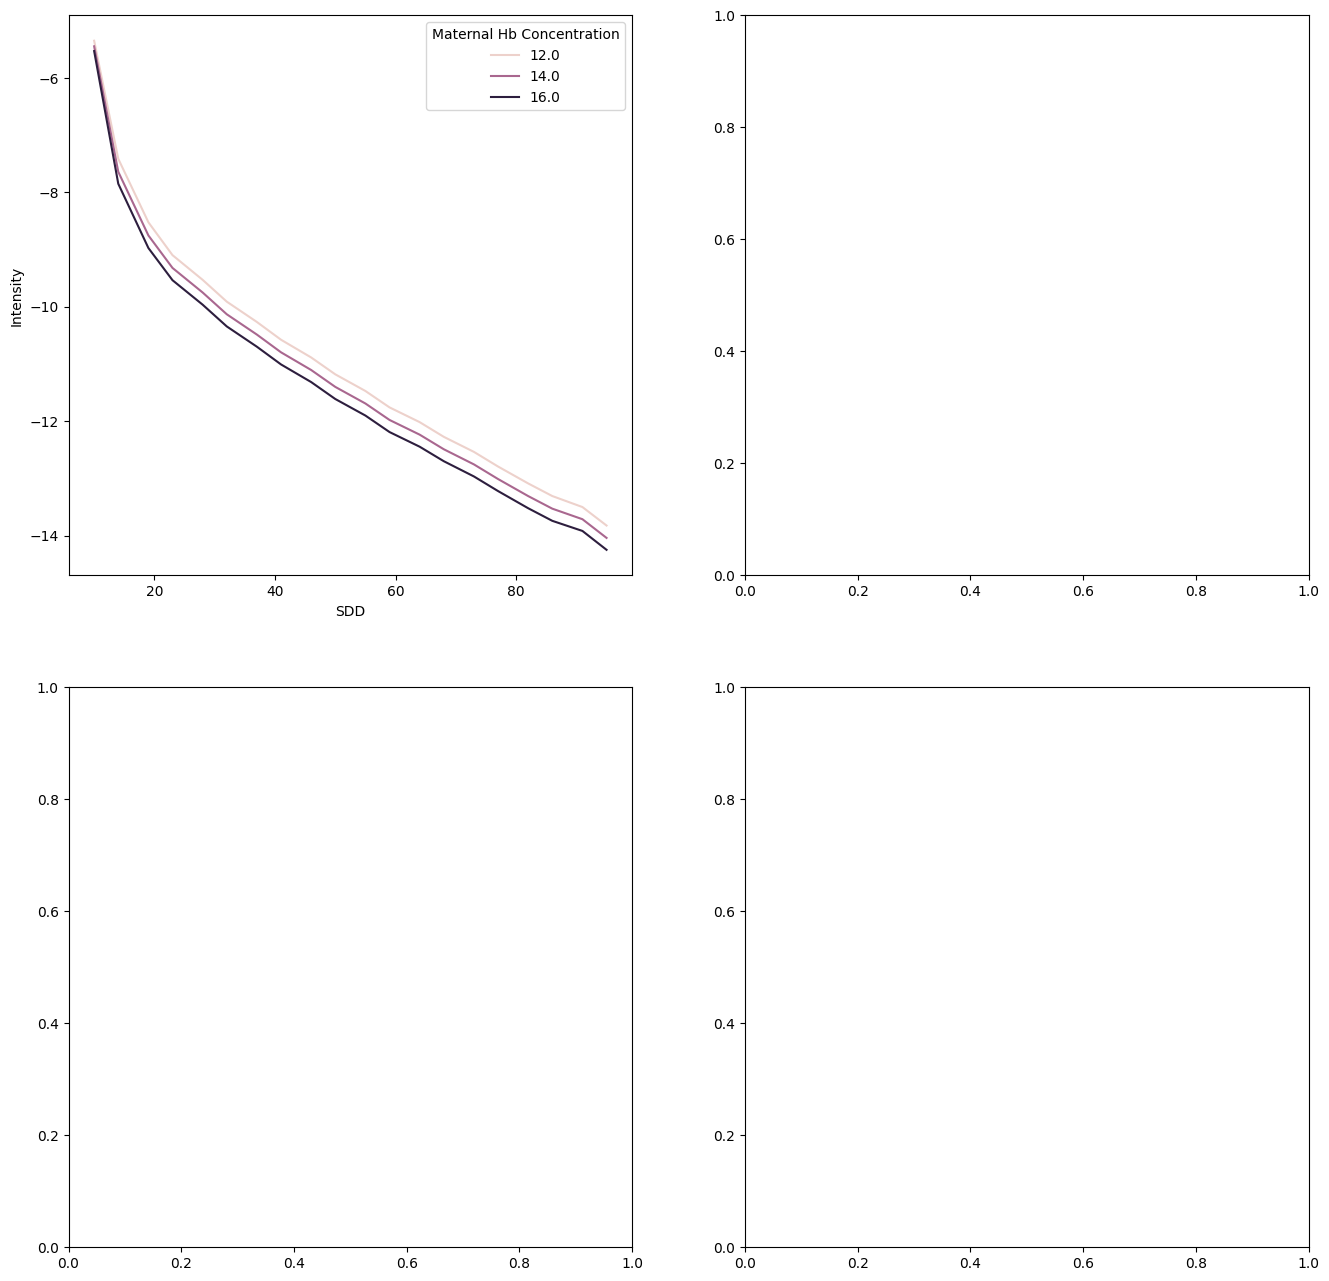

In [22]:
THICKNESS = 2.0
WAVE_INT = 2
MATERNAL_CONCENTRATION = 1.2
FETAL_CONCENTRATION = 0.11
MATERNAL_SATURATION = 0.9
FETAL_SATURATION = 0.1


data = data[data["Wave Int"] == WAVE_INT]

filtered_data1 = data[(data['Maternal Saturation']==MATERNAL_SATURATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Fetal Hb Concentration']==FETAL_CONCENTRATION) & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data2 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Fetal Hb Concentration']==FETAL_CONCENTRATION)  & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data3 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Maternal Saturation']==MATERNAL_SATURATION)  & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data4 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Hb Concentration"]==FETAL_CONCENTRATION) & (data['Maternal Saturation']==MATERNAL_SATURATION) & (data['Maternal Wall Thickness']==THICKNESS)]

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_data1, x='SDD', y='Intensity', hue='Maternal Hb Concentration')
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_data2, x='SDD', y='Intensity', hue='Maternal Saturation')
plt.subplot(2, 2, 3)
sns.lineplot(data=filtered_data3, x='SDD', y='Intensity', hue='Fetal Hb Concentration')
plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_data4, x='SDD', y='Intensity', hue='Fetal Saturation')

plt.show()